# Examen D Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Costo mínimo**. Imagine un contenedor rectangular sin tapa que debe satisfacer las siguientes condiciones:

- Este contenedor debe tener un volumen **V**.
- La longitud de su base es el doble que el de su ancho.
- El material para la base cuesta 12.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el costo **C** del contenedor como una función del ancho de la base $x$ y de su altura $h$. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

1. Criterio de Optimización
    - Minimizar el costo del contenedor
2. Variables
    - ancho base (x)
    - longitud base (l) --> $l=2x$
    - altura contenedor (h)
    - área base
    - área de los lados
3. Función de costo
    - $12(area_b)+6(area_l)$
    - $12(4x^2)+6(2xh+4xh)$
    - $$f(x,h)=48x^2+36xh$$
4. Información adicional
    - $V=2x^2*h$
   

2. Determina las dimensiones del contenedor si el volumen debe ser de $12m^3$.

In [44]:
import sympy as sp
sp.var("x,y,h")

(x, y, h)

In [52]:
#definir funcion de costo
def f(x,h):
    return 48*x**2 + 36*x*h

#información adicional
vol = 2*x**2 *h -12

#Expresar y en función de x
h_x=sp.solve(vol,h)[0]
h_x

6/x**2

In [53]:
f_x=f(x,h).subs(h,h_x) #Expresar la función de costo con respecto a x 
f_x

48*x**2 + 216/x

In [54]:
df_x=sp.diff(f_x,x) #derivada de la función
df_x

96*x - 216/x**2

In [65]:
#encontrar punto crítico
pc=sp.solve(df_x,x)[0]
pc
x_num=float(pc)
x_num

1.3103706971044482

In [66]:
h_num=h_x.subs(x,x_num)
float(h_num)

3.494321858945196

In [68]:
l=2*x_num
l

2.6207413942088964

In [70]:
#Volumen del contenedor
x_num*l*h_num

12.0000000000000

**DIMENSIONES DEL CONTENEDOR**

x (ancho)= 1.310371 metros

l (longitud)= 2.620741 metros

h (altura)= 3.494322 metros

3. ¿Cuál fue el costo de fabricar este contenedor?

In [71]:
#Costo de fabricación
f(x_num,h_num)

247.258276391520

El costo de fabricar un contenedor con las dimensiones previamente mencionadas es de \$247.26 MXN.

---
# Segundo punto. Programación lineal (33 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

1. Criterio de optimización
    - Minimizar el costo de compra de todos los componentes
2. Variables 
    - $Proveedor_iComponente_i$
    - $P_1C_1,P_1C_2,P_1C_3,P_2C_1,P_2C_2,P_2C_3,P_3C_1,P_3C_2,P_3C_3$
3. Función de costo
    - $0.5P_1C_1+0.7P_1C_2+0.32P_1C_3+0.6P_2C_1+0.5P_2C_2+0.54P_2C_3+0.7P_3C_1+0.6P_3C_2+0.8P_3C_3$
4. Información adicional
    - Reestricciones de demanda:
    - $P_1C_1+P_2C_1+P_3C_1\geq15000$
    - $P_1C_2+P_2C_2+P_3C_2\geq20000$
    - $P_1C_3+P_2C_3+P_3C_3\geq12000$
    - Reestricciones de Capacidad:
    - $P_1C_1+P_1C_2+P_1C_3\leq21000$
    - $P_2C_1+P_2C_2+P_2C_3\leq16000$
    - $P_3C_1+P_3C_2+P_3C_3\leq16000$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [1]:
import numpy as np
import scipy.optimize as opt

In [3]:
c=np.array([0.5,0.7,0.32,0.6,0.5,0.54,0.7,0.6,0.8])

Aub=np.array([[-1,0,0,-1,0,0,-1,0,0],
              [0,-1,0,0,-1,0,0,-1,0],
              [0,0,-1,0,0,-1,0,0,-1],
              [1,1,1,0,0,0,0,0,0],
              [0,0,0,1,1,1,0,0,0],
              [0,0,0,0,0,0,1,1,1]])
bub=np.array([-15000,-20000,-12000,21000,16000,16000])
opt.linprog(c,Aub,bub, method="simplex")

     con: array([], dtype=float64)
     fun: 22940.0
 message: 'Optimization terminated successfully.'
     nit: 11
   slack: array([   0.,    0.,    0.,    0.,    0., 6000.])
  status: 0
 success: True
       x: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])

**SOLUCIÓN**

Para minizar el costo de compra de componentes con un precio de \$22940, se deben comprar los componentes de la siguiente forma:
1. Proveedor 1:
    - 9000 Componentes 1
    - 0 Componentes 2
    - 12000 Componentes 3
2. Proveedor 2:
    - 0 Componentes 1
    - 16000 Componentes 2 
    - 0 Componentes 3
3. Proveedor 3:
    - 6000 Componentes 1
    - 4000 Componentes 2
    - 0 Componentes 3

# Tercer punto. Ajuste de curvas (33 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 734753 

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [77]:
import pandas as pd
data = pd.read_excel("E01-RegresionLineal.xlsx")

In [78]:
x=np.array(data[0])
y=np.array(data[54])

In [79]:
def f_costo(beta,X,y):
    m,n = X.shape
    beta = np.reshape(beta, [n,1])
    prediccion = X @ beta 
    error = prediccion - y
    return (error.T @ error)[0][0]  

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

In [83]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
x4=np.reshape(x**4,[m,1])
x5=np.reshape(x**5,[m,1])

X1=np.hstack((ones,x1))
X2=np.hstack((ones,x1,x2))
X3=np.hstack((ones,x1,x2,x3))
X4=np.hstack((ones,x1,x2,x3,x4))
X5=np.hstack((ones,x1,x2,x3,x4,x5))

beta_i1=np.random.rand(2,1)
beta_i2=np.random.rand(3,1)
beta_i3=np.random.rand(4,1)
beta_i4=np.random.rand(5,1)
beta_i5=np.random.rand(6,1)

y_v=np.reshape(y,[m,1])

In [84]:
sol1=opt.minimize(f_costo,beta_i1, args=(X1,y_v))
sol3=opt.minimize(f_costo,beta_i3, args=(X3,y_v))
sol5=opt.minimize(f_costo,beta_i5, args=(X5,y_v))


<BarContainer object of 3 artists>

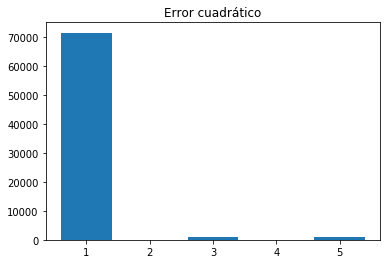

In [85]:
plt.figure()
plt.title("Error cuadrático")
plt.bar([1,3,5],[sol1.fun,sol3.fun,sol5.fun,])

<BarContainer object of 2 artists>

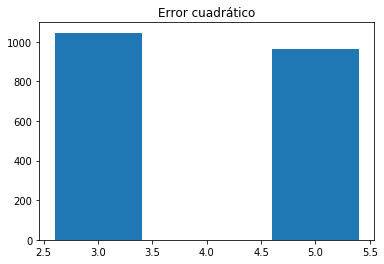

In [86]:
plt.figure()
plt.title("Error cuadrático")
plt.bar([3,5],[sol3.fun,sol5.fun])

**Solución**

El polinomio que mejor se ajusta es el de grado 5.

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

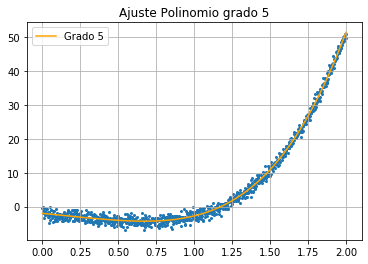

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x,y,s=4)
plt.title("Ajuste Polinomio grado 5")
#plt.plot(x,X1@sol1.x,"r",label="Grado 1")
#plt.plot(x,X3@sol3.x,"g",label="Grado 3")
plt.plot(x,X5@sol5.x,"orange",label="Grado 5")
plt.legend(loc="best")
plt.grid()

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [88]:
def f(x):
    return sol5.x[0] + (sol5.x[1])*x +(sol5.x[2])*x**2 +(sol5.x[3])*x**3 +(sol5.x[4])*x**4 +(sol5.x[5])*x**5

In [89]:
f(0.001)

-1.9759513820318875

In [90]:
f(-0.1)

-1.5066267412368752

In [91]:
f(2.1)

64.3673610326883

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

La extrapolación de datos puede estimar valores mayores o menores al conjunto de datos mientras que la interpolación estima los valores dentro del set de datos.

5. (Punto extra) Agregue un termino $\beta_5 cos(10x)$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

In [96]:
def f2(x):
    return (sol5.x[0] + (sol5.x[1])*x +(sol5.x[2])*x**2 +(sol5.x[3])*x**3 +(sol5.x[4])*x**4 +(sol5.x[5])*x**5)+(np.cos(10*x))

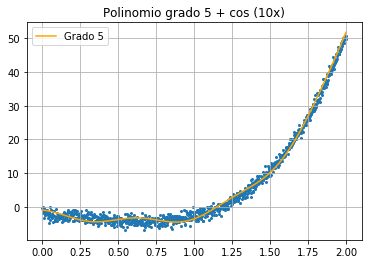

In [97]:
%matplotlib inline
plt.figure()
plt.scatter(x,y,s=4)
plt.title("Polinomio grado 5 + cos (10x)")
plt.plot(x,f2(x),"orange",label="Grado 5")
plt.legend(loc="best")
plt.grid()

El resultado no mejoró agregando el término de $cos(10x)$